In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_csv('../datas/raw_analyst_ratings.csv')

# Display the first few rows to preview the data
print(df.head())

# Check the number of rows and columns in the dataset
print(df.shape)  # (rows, columns)

# List all column names in the DataFrame
print(df.columns)

# Show the data types of each column
print(df.dtypes)

# Display the first few rows again for initial inspection
print(df.head())

# Show summary statistics including categorical columns
print(df.describe(include='all'))

# ⚠️ Incorrect usage: this just prints the describe method itself, not its output
print(df.describe)  # Should be print(df.describe()) to get the summary

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [3]:
import pandas as pd
# 1. Create a new column with the length of each headline
df = pd.read_csv('../datas/raw_analyst_ratings.csv')
df['headline_length'] = df['headline'].apply(len)

# 2. Show basic descriptive statistics
headline_stats = df['headline_length'].describe()

print("📊 Headline Length Statistics:\n", headline_stats)


📊 Headline Length Statistics:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [4]:
# Count number of articles per publisher
publisher_counts = df['publisher'].value_counts()

print("🗞️ Article Count per Publisher:\n", publisher_counts)


🗞️ Article Count per Publisher:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


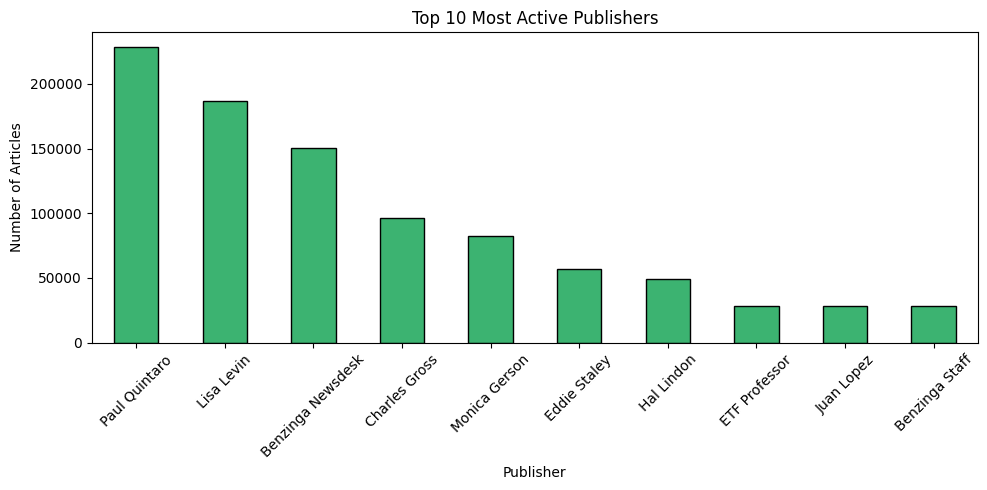

In [5]:
import matplotlib.pyplot as plt

top_publishers = publisher_counts.head(10)

plt.figure(figsize=(10, 5))
top_publishers.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


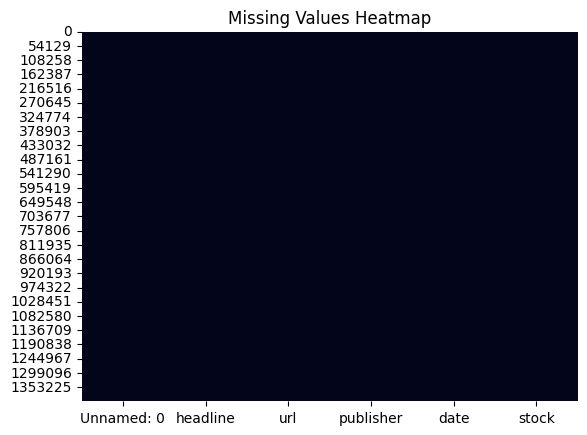

Invalid stock tickers:
 Series([], Name: count, dtype: int64)


In [2]:
# Check for missing values in each column
print(df.isnull().sum())  # Total null values per column

# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False)  # False disables color bar for cleaner look
plt.title("Missing Values Heatmap")
plt.show()

# Filter out rows with invalid stock ticker formats
# Updated valid format: 1–5 uppercase letters, optionally followed by a dot and 1–5 more uppercase letters (e.g., BRK.A)
invalid_stocks = df[~df['stock'].astype(str).str.match(r'^[A-Z]{1,5}(\.[A-Z]{1,5})?$')]

# Display value counts of invalid stock tickers
print("Invalid stock tickers:\n", invalid_stocks['stock'].value_counts())

In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Count articles published on each date
daily_counts = df['date'].value_counts().sort_index()

# Display a few
print(daily_counts.head())



date
2011-04-27 21:01:48-04:00    1
2011-04-28 13:49:29-04:00    1
2011-04-28 15:00:36-04:00    1
2011-04-29 13:47:06-04:00    1
2011-04-29 16:11:05-04:00    1
Name: count, dtype: int64


C:\Users\Bob\AppData\Local\Temp\ipykernel_3276\3796946327.py:9: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Bob\Desktop\10Acadamy\nova\Nova-Financial-Solutions\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


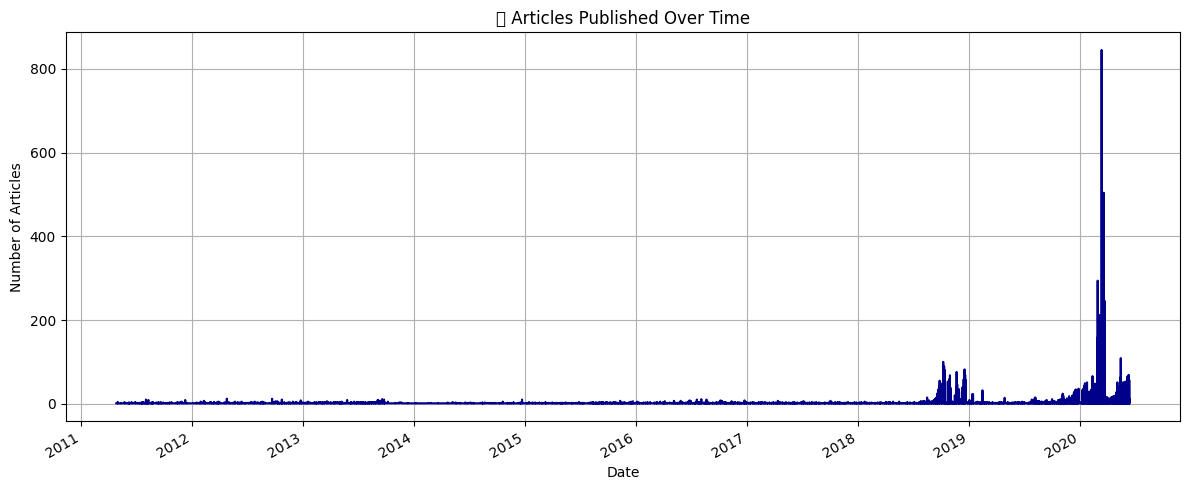

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
daily_counts.plot(kind='line', color='darkblue')
plt.title('🗓️ Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
monthly_counts = df['date'].dt.to_period('M').value_counts().sort_index()
weekly_counts = df['date'].dt.to_period('W').value_counts().sort_index()


C:\Users\Bob\AppData\Local\Temp\ipykernel_3276\1989449555.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = df['date'].dt.to_period('M').value_counts().sort_index()
C:\Users\Bob\AppData\Local\Temp\ipykernel_3276\1989449555.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  weekly_counts = df['date'].dt.to_period('W').value_counts().sort_index()


📅 Articles by Day of Week:
 day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


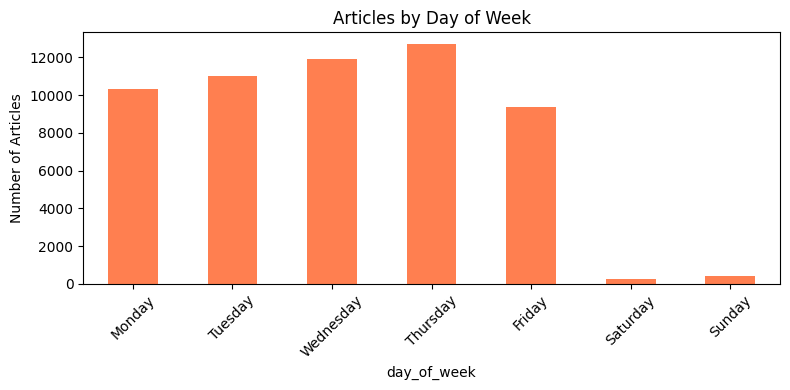

In [9]:
df['day_of_week'] = df['date'].dt.day_name()
weekday_counts = df['day_of_week'].value_counts()

print("📅 Articles by Day of Week:\n", weekday_counts)

# Plot
weekday_counts = weekday_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekday_counts.plot(kind='bar', color='coral', figsize=(8, 4), title='Articles by Day of Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
print("Unique dates:", df['date'].nunique())
print(df['date'].sample(5))  # Random samples to check format

Unique dates: 39957
771054     2012-10-30 00:00:00
1204137    2016-02-18 00:00:00
755518     2012-01-17 00:00:00
40378      2019-03-19 00:00:00
509636     2018-01-15 00:00:00
Name: date, dtype: object


In [4]:
# Filter out rows where the 'url' column does not start with 'http'
# This helps identify potentially invalid or malformed URLs
invalid_urls = df[~df['url'].astype(str).str.startswith("http")]

# Print out the invalid URLs
print("Invalid URLs:", invalid_urls['url'])

Invalid URLs: Series([], Name: url, dtype: object)


In [5]:
print("Top publishers:\n", df['publisher'].value_counts().head())


Top publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


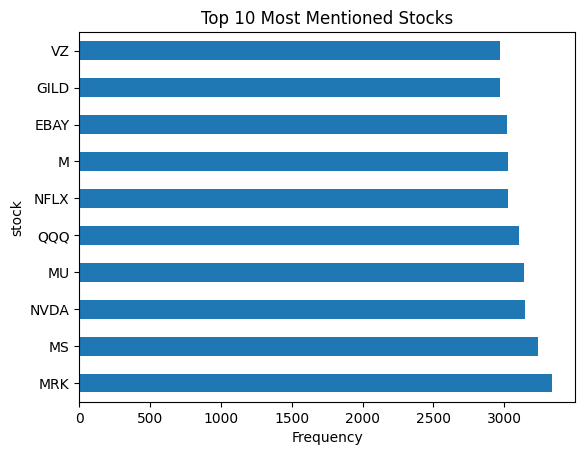

In [6]:
# Most frequent stock mentions
df['stock'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Most Mentioned Stocks")
plt.xlabel("Frequency")
plt.show()

In [7]:
# Function to validate stock tickers
# Only allow tickers with 1-5 uppercase letters,
# optionally followed by a dot and 1-5 uppercase letters (e.g. BRK.A)
def is_valid_ticker(ticker):
    pattern = r'^[A-Z]{1,5}(\.[A-Z]{1,5})?$'  # Regex pattern for valid ticker format
    return bool(re.match(pattern, str(ticker).strip()))

# Filter rows to keep only those with valid stock tickers
df = df[df['stock'].astype(str).apply(is_valid_ticker)]

# Remove rows where the headline is missing or empty (after trimming whitespace)
df = df[df['headline'].notnull()]
df = df[df['headline'].str.strip() != ""]

# Filter rows where the URL starts with 'http' to keep only valid URLs
df = df[df['url'].astype(str).str.startswith('http')]

# Remove rows where publisher is missing or empty (optional but recommended)
df = df[df['publisher'].notnull()]
df = df[df['publisher'].str.strip() != ""]

# Convert the 'date' column to datetime, coercing errors to NaT (invalid dates)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where the 'date' conversion failed (NaT values)
df = df.dropna(subset=['date'])

# Reset the DataFrame index after filtering rows
df = df.reset_index(drop=True)

# Save the cleaned DataFrame to a new CSV file without the index column
df.to_csv('../datas/raw_analyst_ratings_cleaned.csv', index=False)

# Print confirmation with the number of rows saved
print(f"Cleaning complete. Saved {df.shape[0]} rows to 'raw_analyst_ratings_cleaned.csv'.")


Cleaning complete. Saved 55987 rows to 'raw_analyst_ratings_cleaned.csv'.
